In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 3 GitHub repository:

**UPDATE THIS LINK**
https://github.com/nicolelpepper/eds220-hwk3.git


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?usp=sharing) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

- Delete all the comments initially included in this notebook (ex: `# Your code here`).


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
You can find extra information and metadata for this dataset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 


## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your `git` workflow if you try to push them. Your `data/` directory should not be in your GitHub repository.

## 2. Datasets description
Read the metadata for both datsets and write a description about each one. Indicate the date sources and date of access.


`ANSWER:` 
- The `Spill_Incidents_20241103.csv` dataset is provided by the New York State Department of Environmental Conservation. It contains records of spills of petroleum and other hazardous materials, as reported by the spiller or others who have knowledge of the spill, for the state of New York. (Access Date: 11/05/24)
- The `tl_2023_us_county.shp` dataset is provided by the U.S. Census Bureau. The TIGER/Line Shapefiles are extracts of selected geographic and cartographic information from the. The shapefiles include information for the fifty states, the District of Columbia, Puerto Rico, and the Island Areas (American Samoa, the Commonwealth of the Northern Mariana Islands, Guam, and the United States Virgin Islands). The shapefiles include polygon boundaries of geographic areas and features, linear features including roads and hydrography, and point features. These shapefiles do not contain any sensitive data or confidential data. (Access Date: 11/05/24)

## 3. Import libraries

In [79]:
# Load libraries
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [3]:
# Import NY Spills data
spills = pd.read_csv('data/Spill_Incidents_20241103.csv')

# Import Tigerline Shapefile for U.S.
county = gpd.read_file('data/tl_2023_us_county/tl_2023_us_county.shp')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/share/proj failed


## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head.

b. Check the data types of the columns.

c. Check the unique values in the `material_family` column.

d. Check the unique values in the `county` column.

You can add other cells for preliminary data exploration.

In [4]:
# a. Check the spills dataframes head
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [5]:
# b. Check the data types of the columns
spills.dtypes

Spill Number               int64
Program Facility Name     object
Street 1                  object
Street 2                  object
Locality                  object
County                    object
ZIP Code                  object
SWIS Code                  int64
DEC Region                 int64
Spill Date                object
Received Date             object
Contributing Factor       object
Waterbody                 object
Source                    object
Close Date                object
Material Name             object
Material Family           object
Quantity                 float64
Units                     object
Recovered                float64
dtype: object

### Note that the column names aren't clean yet.... so doesn't match instructions [set up as array right now]

In [6]:
# c. Check the unique values in the `material_family` column.
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [7]:
# d. Check the unique values in the `county` column.
spills['County'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans',
       'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung',
       'Seneca', 'Oneida', 'Broome', 'Hamilton', 'Washington', 'Franklin',
       'Columbia', 'Fulton', 'Herkimer', 'Schoharie', 'Rensselaer',
       'Montgomery', 'Putnam', 'Delaware', 'New Jersey - Region 2',
       'Steuben', 'Tioga', 'Chautauqua', 'Cattaraugus', 'Wyoming',
       'Yates', 'Greene', 'Pennsylvania - Region 9', 'Allegany',
       'New Jersey - Region 3 (N)', 'Cattaraugus Indian Reservation',
       'New Jersey - Region 3 (T)', 'Canada - Region 6',
       'Canada - Region 9', 'Pennsyl

In [8]:
# Confirm spills is an array
type(spills)

pandas.core.frame.DataFrame

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

<!-- END QUESTION -->

*Your answer here.*

`ANSWER:` Using preliminary data exploration for the spills dataset I got the following information  - using `.head()` I viewed the first 5 rows of the dataframe to get a glimpse of what the columns are and how the records under each are listed. I then used `dtypes` to see the type that the records are saved as for each column. I then got the unique values for the `material_family` and `county` columns to use to subset the dataset.

With the preliminary data exploration, I got to see what the first five columns of the data looks like, including column names and their entries. 

### 5.B. Cleaning
a. Simplify column names as needed.

b. Update column data types as needed. If you're not sure if any data types are needed at this point, you may come back later to this cell.

In [9]:
# a. Simplify column names
spills.columns = (spills.columns # Select columns
                  .str.strip() # Remove spaces before or after string values
                  .str.lower() # Set strings to lowercase
                  .str.replace(" ", "_")) # Replace space with underscore



In [10]:
# b. Update column data types for date columns
# Change 'spilldate', 'received data', and 'close date' to datetime objects
spills[['spill_date', 'received_date', 'close_date']] = (spills[['spill_date', 'received_date', 'close_date']]
                                                         .apply(pd.to_datetime, errors='coerce'))
spills.dtypes

spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                         int64
dec_region                        int64
spill_date               datetime64[ns]
received_date            datetime64[ns]
contributing_factor              object
waterbody                        object
source                           object
close_date               datetime64[ns]
material_name                    object
material_family                  object
quantity                        float64
units                            object
recovered                       float64
dtype: object

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st 2023 (including both dates). Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [11]:
# a. Select spills between 1/23 and 10/31
petr_23 = spills[(spills['material_family'] == 'Petroleum') & # Filter to only Petroleum spills
                 (spills['spill_date'] >= '2023-01-01') & # Filter to Jan 1 start date
                 (spills['spill_date'] <= '2023-10-31')] # Filter to Oct 31 end date

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print messages verifying that `petr_23` only has data for 2023 and from January through October.
HINT: [pandas.Series.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) and [pandas.Series.dt.month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html).

In [12]:
# b. Verify that petr_23 filtered dates correctly

print(f"The year(s) of the data is: {petr_23['spill_date'].dt.year.unique().tolist()}")
print(f"The month(s) of the data are: {sorted(petr_23['spill_date'].dt.month.unique().tolist())}")


The year(s) of the data is: [2023]
The month(s) of the data are: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [13]:
# c. Verify that petr_23 only has petroleum spills
assert (petr_23['material_family'] == 'Petroleum').all()

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new data frame named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Data frame has two columns only:
    - Column one: county names, column name = `county`
    - Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.


In [14]:
# Create new df with number of petroleum spills per county from Jan to Oct. 2023
spills_per_county = (petr_23['county'] # Select county column
                     .value_counts() # Count unique values
                     .reset_index()  # Reset index to start from 0
                     .rename(columns = {'county' : 'spills', # Rename columns
                                        'index' : 'county'})) 
spills_per_county

,county,spills
0,Westchester,743
1,Suffolk,723
2,Nassau,576
3,Orange,336
4,Queens,321
...,...,...
59,Schuyler,11
60,Hamilton,11
61,New Jersey - Region 2,6
62,Yates,6


## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head.

b. Check the data types of the columns.

c. Check the geo-dataframe's CRS.

d. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [15]:
# a. Check the 'county' df head
county.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [16]:
# b. Check the 'county' column data types
county.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [17]:
# c. Check the 'county' crs
county.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<AxesSubplot:>

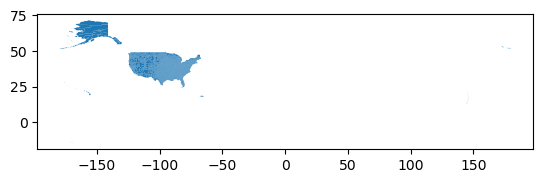

In [18]:
# d. Plot the county data
county.plot()

In [19]:
# e. Other data exploration
# Check column names in county data
county.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'GEOIDFQ', 'NAME',
       'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

In [20]:
# Count null values for columns in the county data
county.isnull().sum()

STATEFP        0
COUNTYFP       0
COUNTYNS       0
GEOID          0
GEOIDFQ        0
NAME           0
NAMELSAD       0
LSAD           0
CLASSFP        0
MTFCC          0
CSAFP       1894
CBSAFP      1320
METDIVFP    3096
FUNCSTAT       0
ALAND          0
AWATER         0
INTPTLAT       0
INTPTLON       0
geometry       0
dtype: int64

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

*Your answer here.*

`ANSWER:` Using preliminary data exploration for the county dataset I got the following information - using `.head()` I viewed the first 5 rows of the dataframe to get a glimpse of what the columns are and how the records under each are listed. I then used `dtypes` to see the type that the records are saved as for each column. Next, I checked the the crs of the dataset and made a preliminary plot to get an idea of what the data looks like.

<!-- END QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [21]:
# Simplify column names
county.columns = (county.columns # Select columns
                  .str.strip() # Remove spaces before or after string values
                  .str.lower() # Set strings to lowercase
                  .str.replace(" ", "_")) # Replace space with underscore
county.head()

,statefp,countyfp,countyns,geoid,geoidfq,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them.

<AxesSubplot:>

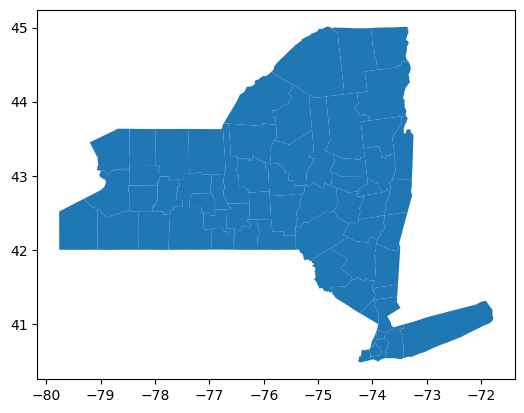

In [22]:
# Select all the counties for the state of New York in a new variable `ny_counties` and plot them.
# a. Select spills between 1/23 and 10/31
ny_counties = county[(county['statefp'] == '36')]
ny_counties.plot()


## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.


In [23]:
# a. Print the names of counties in `ny_counties`, without repetition.
ny_county_names = ny_counties['name'].unique()

In [24]:
# b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.
spills_county_names = spills_per_county['county'].unique()



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 



In [25]:
# Create a list of county names that are in `spills_per_county`, but not in `ny_counties`
diff_names_spills = list(np.setdiff1d(spills_county_names, ny_county_names))

diff_names_spills

['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']


d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [26]:
# Create a list of county names that are in `ny_counties`, but not in `spills_per_county`
diff_names_ny = list(np.setdiff1d(ny_county_names, spills_county_names))
diff_names_ny

['St. Lawrence']

e. What is the number of spills in 'Tuscarora Indian Reservation'?

In [27]:
# Calculate the number of spills in the Tuscarora Indian Reservation
tuscarora_spills = spills_per_county[spills_per_county['county'] == 'Tuscarora Indian Reservation'].iloc[:, 1].sum()
tuscarora_spills

1

### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and use an `assert` statement to verify that the update was successful.

You may add cells if needed.

In [28]:
#  Update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame
spills_per_county['county'] = spills_per_county['county'].replace('St Lawrence', 'St. Lawrence')

# Verify that the update was successful.
assert 'St. Lawrence' in spills_per_county['county'].values

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [29]:
# a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 

# Rename the join columns to match for the ny_counties and spills_per_county data
ny_counties = ny_counties.rename(columns={'name': 'county_name'})
spills_per_county = spills_per_county.rename(columns={'county': 'county_name'})

In [30]:
ny_counties

,statefp,countyfp,countyns,geoid,geoidfq,county_name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
46,36,101,00974148,36101,0500000US36101,Steuben,Steuben County,06,H1,G4020,236,18500,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999..."
165,36,091,00974143,36091,0500000US36091,Saratoga,Saratoga County,06,H1,G4020,104,10580,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911..."
173,36,003,00974100,36003,0500000US36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666409356,12990521,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518..."
203,36,075,00974136,36075,0500000US36075,Oswego,Oswego County,06,H1,G4020,532,45060,None,A,2464650884,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706..."
210,36,111,00974153,36111,0500000US36111,Ulster,Ulster County,06,H1,G4020,408,28740,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,36,051,00974124,36051,0500000US36051,Livingston,Livingston County,06,H1,G4020,464,40380,None,A,1635976564,22076449,+42.7290418,-077.7784630,"POLYGON ((-77.65085 42.58037, -77.65159 42.580..."
2963,36,025,00974111,36025,0500000US36025,Delaware,Delaware County,06,H1,G4020,None,None,None,A,3736306657,64163829,+42.1939865,-074.9667281,"POLYGON ((-74.66969 42.06782, -74.67035 42.067..."
3157,36,071,00974134,36071,0500000US36071,Orange,Orange County,06,H1,G4020,408,28880,None,A,2103272841,67953621,+41.4024096,-074.3062522,"POLYGON ((-74.24491 41.60376, -74.24456 41.603..."
3158,36,093,00974144,36093,0500000US36093,Schenectady,Schenectady County,06,H1,G4020,104,10580,None,A,530089712,12366944,+42.8175516,-074.0435592,"POLYGON ((-73.89962 42.76425, -73.90678 42.763..."


In [31]:
#ny_counties['county_name'] = ny_counties['name']

In [32]:
spills_per_county

,county_name,spills
0,Westchester,743
1,Suffolk,723
2,Nassau,576
3,Orange,336
4,Queens,321
...,...,...
59,Schuyler,11
60,Hamilton,11
61,New Jersey - Region 2,6
62,Yates,6


In [33]:
# b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.
ny_counties = pd.merge(ny_counties, # Join dataset left
                       spills_per_county,  # Join dataset right
                       how = 'inner', # Select "Inner" join
                       on = 'county_name') # Join column

In [34]:
ny_counties

,statefp,countyfp,countyns,geoid,geoidfq,county_name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,spills
0,36,101,00974148,36101,0500000US36101,Steuben,Steuben County,06,H1,G4020,236,18500,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",72
1,36,091,00974143,36091,0500000US36091,Saratoga,Saratoga County,06,H1,G4020,104,10580,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",161
2,36,003,00974100,36003,0500000US36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666409356,12990521,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",30
3,36,075,00974136,36075,0500000US36075,Oswego,Oswego County,06,H1,G4020,532,45060,None,A,2464650884,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",68
4,36,111,00974153,36111,0500000US36111,Ulster,Ulster County,06,H1,G4020,408,28740,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,36,051,00974124,36051,0500000US36051,Livingston,Livingston County,06,H1,G4020,464,40380,None,A,1635976564,22076449,+42.7290418,-077.7784630,"POLYGON ((-77.65085 42.58037, -77.65159 42.580...",59
58,36,025,00974111,36025,0500000US36025,Delaware,Delaware County,06,H1,G4020,None,None,None,A,3736306657,64163829,+42.1939865,-074.9667281,"POLYGON ((-74.66969 42.06782, -74.67035 42.067...",41
59,36,071,00974134,36071,0500000US36071,Orange,Orange County,06,H1,G4020,408,28880,None,A,2103272841,67953621,+41.4024096,-074.3062522,"POLYGON ((-74.24491 41.60376, -74.24456 41.603...",336
60,36,093,00974144,36093,0500000US36093,Schenectady,Schenectady County,06,H1,G4020,104,10580,None,A,530089712,12366944,+42.8175516,-074.0435592,"POLYGON ((-73.89962 42.76425, -73.90678 42.763...",77



From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [35]:
# c. Your code here

# Set index to admin column
ny_counties = ny_counties.set_index('county_name')

# Update add 1 to the index value at Niagara
ny_counties.at['Niagara','spills'] += 1 

In [36]:
# Display update ny_counties columns
pd.set_option('display.max_rows', None)
ny_counties

,statefp,countyfp,countyns,geoid,geoidfq,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,spills
county_name,,,,,,,,,,,,,,,,,,,
Steuben,36,101,00974148,36101,0500000US36101,Steuben County,06,H1,G4020,236,18500,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",72
Saratoga,36,091,00974143,36091,0500000US36091,Saratoga County,06,H1,G4020,104,10580,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",161
Allegany,36,003,00974100,36003,0500000US36003,Allegany County,06,H1,G4020,None,None,None,A,2666409356,12990521,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",30
Oswego,36,075,00974136,36075,0500000US36075,Oswego County,06,H1,G4020,532,45060,None,A,2464650884,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",68
Ulster,36,111,00974153,36111,0500000US36111,Ulster County,06,H1,G4020,408,28740,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",161
St. Lawrence,36,089,00977309,36089,0500000US36089,St. Lawrence County,06,H1,G4020,None,32390,None,A,6939939683,366960962,+44.4881125,-075.0743110,"POLYGON ((-74.64908 44.08834, -74.66684 44.086...",65
Schuyler,36,097,00974146,36097,0500000US36097,Schuyler County,06,H1,G4020,None,None,None,A,850405403,36246373,+42.4197755,-076.9386030,"POLYGON ((-77.10711 42.48377, -77.10684 42.483...",11
Essex,36,031,00974114,36031,0500000US36031,Essex County,06,H1,G4020,None,None,None,A,4646753187,316350563,+44.1096005,-073.7784307,"POLYGON ((-73.61820 43.78678, -73.62207 43.786...",57
Suffolk,36,103,00974149,36103,0500000US36103,Suffolk County,06,H1,G4020,408,35620,35004,A,2359277313,3787417976,+40.9435540,-072.6922183,"POLYGON ((-71.80938 41.20323, -71.79115 41.184...",723


<!-- BEGIN QUESTION -->

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an [annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) with the data source (New York State Department of Environmental Conservation) and date of access.



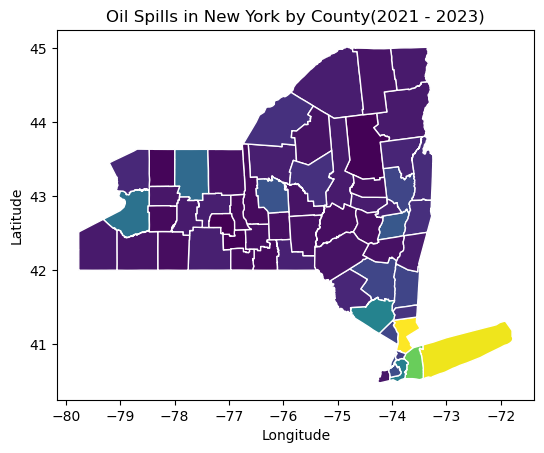

In [41]:
# 1) initialize a blank figure and axes
fig, ax = plt.subplots()

# Add layers to our figures axis
ny_counties.plot(ax=ax,
                 column = 'spills',
                edgecolor = 'white')

# Customization
ax.set_title('Oil Spills in New York by County(2021 - 2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the figure
plt.show()

In [43]:
ny_counties_utm18 = ny_counties.to_crs(epsg=32618)

Text(0.5, 0.06, 'Data source: New York State Department of Environmental Conservation (Access Date: 11/05/24)')

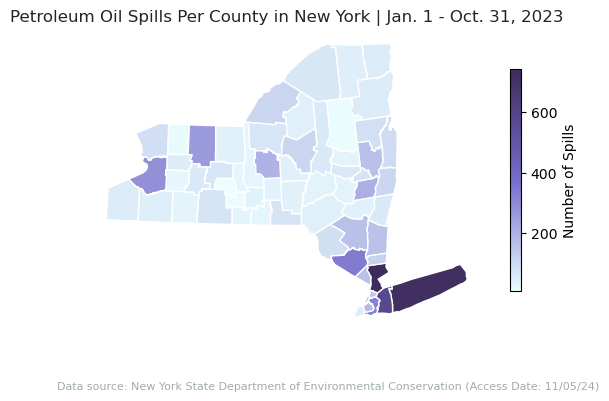

In [98]:
# a. Your code here

# Define custom colors
spill_cols = ["#EAFEFE", "#766CCC", "#3E2C5C"]
spills_cmap = LinearSegmentedColormap.from_list("spills_cmap", spill_cols)

fig, ax = plt.subplots()

# Plot map
ny_counties_utm18.plot(column='spills',
                 cmap=spills_cmap,
                 edgecolor="white",
                 ax=ax,
                 legend=True,
                legend_kwds={
        'label': "Number of Spills",
        'orientation': "vertical",
        'shrink': 0.6
    }
)

# Add labels
ax.set_title('Petroleum Oil Spills Per County in New York | Jan. 1 - Oct. 31, 2023',
            color="#222626", 
            fontsize=12)

ax.axis('off')
ax.set_facecolor("#222626") 

# Add data source annotation
fig.text(0.5, 0.06,
         'Data source: New York State Department of Environmental Conservation (Access Date: 11/05/24)', 
         ha='center',
         color="#A1ABAB",
         fontsize=8)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Write a figure description for the map, including tha names of the top 3 counties with the most petroleum spills. If you need to do additional data analysis to include relevant information from the data, you may include additional code cells here.

In [109]:
# Order by spills and select top 3
ny_top_3 = (ny_counties_utm18.sort_values(by="spills",
                                                   ascending=False).head(3))
# Iterate through the top three to print name and number of spills
for index, row in ny_top_3.iterrows():
    print(f"{index} had  {row['spills']} spills")

Westchester had  743 spills
Suffolk had  723 spills
Nassau had  576 spills


DESCRIPTION: This map displays the number of Petroleum oil spills per county in the state of New York from January 1 to October 31, 2023. The counties are colored by the number of spills ranging from 0 (light blue) to just under 750 (dark purple). The counties with the three highest number of spills are Westchester (743), Suffolk (723), and Nassau (576).

This map uses data from New York State Department of Environmental Conservation and the U.S. Census Bureau, accessed November 5, 2024.
